<a href="https://colab.research.google.com/github/Gita2023/InternIntelligence_ProjectName/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task Three (Advanced Statistical Analysis)**

**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler


**Load the Dataset**

In [8]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign (1).csv


**Inspect the Dataset**

In [11]:
df = pd.read_csv("marketing_campaign (1).csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   DtCustomer           2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Clean and Prepare Data**

In [14]:
# Drop rows with missing values
df.dropna(inplace=True)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Convert enrollment date to datetime (format: day-month-year with dashes)
df['DtCustomer'] = pd.to_datetime(df['DtCustomer'], format="%d-%m-%Y", errors='coerce')

# Optional: drop rows where date conversion failed
df.dropna(subset=['DtCustomer'], inplace=True)

# Create total spending column
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpent'] = df[spending_cols].sum(axis=1)




**Exploratory Data Analysis (EDA)**

Data Types:

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
DtCustomer             datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64

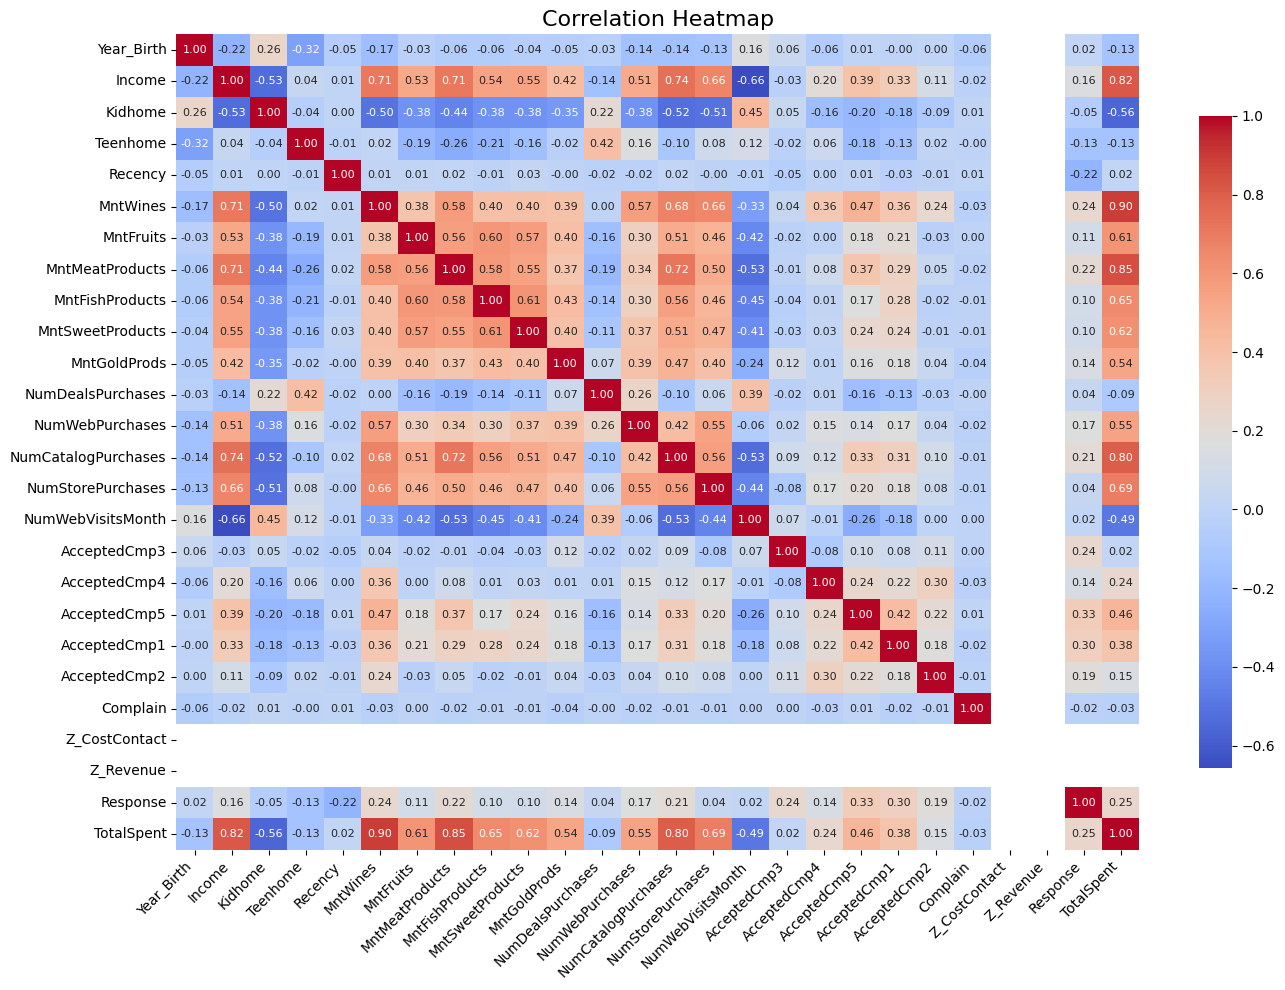

In [21]:
# Print data types
print("Data Types:\n")
print(df.dtypes)

# Drop non-numeric or unwanted columns
df_corr = df.drop(columns=['Education', 'Marital_Status', 'DtCustomer', 'ID'])

# Generate correlation matrix
corr_matrix = df_corr.corr()

# Plot improved heatmap
plt.figure(figsize=(14, 10))  # Larger figure size
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            annot_kws={"size": 8},       # Smaller font in heatmap cells
            cbar_kws={"shrink": 0.8})    # Shrink color bar
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels
plt.yticks(rotation=0, fontsize=10)               # Keep y labels horizontal
plt.tight_layout()  # Prevent clipping
plt.show()



**Hypothesis Testing**

In [22]:
married = df[df['Marital_Status'] == 'Married']['Income']
single = df[df['Marital_Status'] == 'Single']['Income']

t_stat, p_val = ttest_ind(married, single)
print(f"T-statistic = {t_stat}, P-value = {p_val}")


T-statistic = 1.6669287431158581, P-value = 0.09593053134915044


**Regression Analysis**

In [23]:
X = df[['Income', 'Recency', 'Kidhome']]
y = df['TotalSpent']
X = sm.add_constant(X)  # Adds intercept

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             TotalSpent   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     970.7
Date:                Fri, 04 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:22:18   Log-Likelihood:                -9482.7
No. Observations:                1311   AIC:                         1.897e+04
Df Residuals:                    1307   BIC:                         1.899e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -402.2392     37.243    -10.800      0.0

**Factor Analysis**

In [24]:
# Select campaign response columns
campaign_vars = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[campaign_vars])

# Factor analysis
fa = FactorAnalysis(n_components=2)
factors = fa.fit_transform(X_scaled)

# Add factor scores to DataFrame
df['Factor1'] = factors[:, 0]
df['Factor2'] = factors[:, 1]


**Visualize Insights**

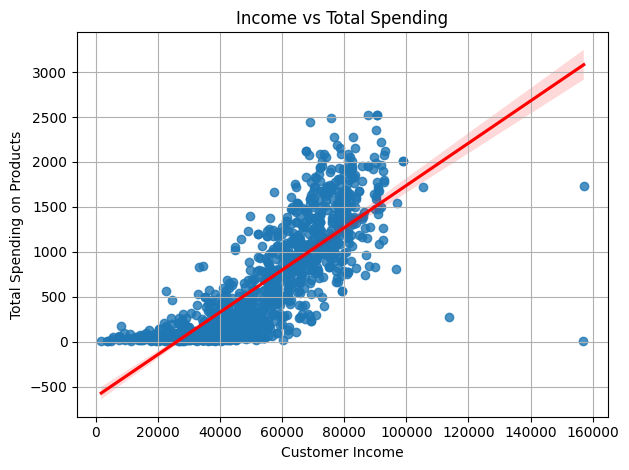

In [25]:
# Plot: Income vs Total Spent with regression line
sns.regplot(x='Income', y='TotalSpent', data=df, line_kws={"color": "red"})
plt.title("Income vs Total Spending")
plt.xlabel("Customer Income")
plt.ylabel("Total Spending on Products")
plt.grid(True)
plt.tight_layout()
plt.show()

**Summary: What We Found & What to Do**

**What We Found**


*   Income matters — People with higher income spend more.
*   More kids = less spending — Families with more kids at home spend less.

*   Recency doesn't matter — How recently someone bought something doesn’t affect how much they spend overall.
*   The model explains about 69% of spending behavior — that’s a strong result.





**What to Do**

*   Focus on high-income customers

1.   *Offer premium products or exclusive deals.*



*   Create deals for families

1.   *Budget bundles or family-friendly offers can help increase spending.*



